## Introducción

<b> Contexto </b>

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

<b> Descripción de los datos </b>

    Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset
    
    • Hypotheses: breves descripciones de las hipótesis
    • Reach: alcance del usuario, en una escala del uno a diez
    • Impact: impacto en los usuarios, en una escala del uno al diez
    • Confidence: confianza en la hipótesis, en una escala del uno al diez
    • Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

    Datos utilizados en la segunda parte del proyecto

/datasets/orders_us.csv Descarga el dataset
    
    • transactionId: identificador de pedido
    • visitorId: identificador del usuario que realizó el pedido
    • date: fecha del pedido
    • revenue: ingresos del pedido
    • group: el grupo del test A/B al que pertenece el usuario

/datasets/visits_us.csv Descarga el dataset
    
    • date: la fecha
    • group: grupo del test A/B
    • visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

<b> Parte 1. Priorizar hipótesis </b>

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.
El ejercicio consiste en:
    • Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
    • Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
    • Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

<b> Parte 2. Análisis de test A/B </b>

Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Ejercicio

Analiza el test A/B:
    
    1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
    
    2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
    
    3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
    
    4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
    
    5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
    
    6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
    
    7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
    
    8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
    
    9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
    
    10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
    
    11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
    
    12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
    
    13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.



## Cargar datos

Se creó una función para cargar los datos de los archivos CSV ya que se llamará en más de una ocasión a lo largo del código.

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from IPython.display import Image, display
import os
import datetime as dt

In [2]:
def data_load():	
    ruta_archivo = os.path.join('datasets', 'hypotheses_us.csv')
    hypotheses = pd.read_csv(
	    ruta_archivo,
        sep= ';' 
	    # dtype={'source_id': 'category'}, 
	    # parse_dates=['dt'], 
	    # nrows=500
	    )
    ruta_archivo = os.path.join('datasets', 'orders_us.csv')
    orders = pd.read_csv(
	    ruta_archivo
	    # dtype={'group': 'category'}
	    # parse_dates=['dt'], 
	    # nrows=500
	    )
    ruta_archivo = os.path.join('datasets', 'visits_us.csv')
    visits = pd.read_csv(
	    ruta_archivo
	    # dtype={'group': 'category'}
	    # parse_dates=['dt'], 
	    # nrows=500
	    )
    return hypotheses, orders, visits

[hypotheses, orders, visits] = data_load()

In [3]:
hypotheses.info(memory_usage= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
orders.info(memory_usage= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [5]:
orders.sample(10, random_state= 4123)

,transactionId,visitorId,date,revenue,group
816,3585957438,3229395114,2019-08-21,125.9,A
725,2309447140,2913441496,2019-08-07,25.9,B
452,3367644853,2307676173,2019-08-06,85.1,B
951,965979600,48147722,2019-08-22,20.8,B
336,3745550734,1703949673,2019-08-25,125.1,B
974,836739159,4283872382,2019-08-22,60.6,B
398,2084190534,3673190339,2019-08-28,60.8,A
1135,453686528,2134820861,2019-08-13,295.7,A
1093,3894437543,276558944,2019-08-12,80.7,A
400,2061627240,1402025725,2019-08-28,90.5,A


In [6]:
visits.info(memory_usage= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
visits.sample(10, random_state= 4123)

,date,group,visits
33,2019-08-03,B,509
26,2019-08-27,A,711
21,2019-08-22,A,609
40,2019-08-10,B,369
10,2019-08-11,A,718
47,2019-08-17,B,421
43,2019-08-13,B,769
61,2019-08-31,B,718
35,2019-08-05,B,707
49,2019-08-19,B,487


## 1. Priorizar hipótesis

In [8]:
hypotheses.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
hypotheses['hypothesisId'] = range(0, len(hypotheses['hypothesis']))

In [9]:
hypotheses

,hypothesis,reach,impact,confidence,effort,hypothesisId
0,Add two new channels for attracting traffic. T...,3,10,8,6,0
1,Launch your own delivery service. This will sh...,2,5,4,10,1
2,Add product recommendation blocks to the store...,8,3,7,3,2
3,Change the category structure. This will incre...,8,3,3,8,3
4,Change the background color on the main page. ...,3,1,1,1,4
5,Add a customer review page. This will increase...,3,2,2,3,5
6,Show banners with current offers and sales on ...,5,3,8,3,6
7,Add a subscription form to all the main pages....,10,7,8,5,7
8,Launch a promotion that gives users discounts ...,1,9,9,5,8


In [10]:
hypotheses['ICE'] = ((hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort'])

print(hypotheses[['hypothesisId', 'ICE']].sort_values(by = 'ICE', ascending = False))

   hypothesisId        ICE
8             8  16.200000
0             0  13.333333
7             7  11.200000
6             6   8.000000
2             2   7.000000
1             1   2.000000
5             5   1.333333
3             3   1.125000
4             4   1.000000


In [11]:
hypotheses['RICE'] = ((hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort'])

print(hypotheses[['hypothesisId', 'RICE']].sort_values(by = 'RICE', ascending = False))

   hypothesisId   RICE
7             7  112.0
2             2   56.0
0             0   40.0
6             6   40.0
8             8   16.2
3             3    9.0
1             1    4.0
5             5    4.0
4             4    3.0


### Cambios en la Priorización

1. **HypothesisId 7:**
   - **ICE:** Está en la tercera posición.
   - **RICE:** Sube a la primera posición.
   - **Explicación:** La hipótesis 7 probablemente tiene un alto valor de alcance (Reach) en el cálculo de RICE, lo que la hace mucho más prioritaria cuando se considera el número de personas afectadas o beneficiadas por la implementación de esta hipótesis.

2. **HypothesisId 8:**
   - **ICE:** Está en la primera posición.
   - **RICE:** Baja a la quinta posición.
   - **Explicación:** Aunque la hipótesis 8 es muy efectiva y fácil de implementar (como sugiere su alta puntuación ICE), su valor de alcance es probablemente bajo, reduciendo su prioridad en el modelo RICE.

3. **HypothesisId 2:**
   - **ICE:** Está en la quinta posición.
   - **RICE:** Sube a la segunda posición.
   - **Explicación:** La hipótesis 2, como la 7, parece beneficiarse significativamente al considerar su alcance, aumentando su prioridad en RICE.

4. **HypothesisId 0 y 6:**
   - **ICE:** HypothesisId 0 está en segunda posición y 6 en cuarta.
   - **RICE:** Ambas hipótesis están empatadas en la tercera posición.
   - **Explicación:** El alcance parece mejorar ligeramente la posición de la hipótesis 6 y mantiene alta la de la hipótesis 0, aunque hay un cambio en cómo se priorizan en relación con otras.

### Conclusión

El cambio de ICE a RICE tiene un impacto significativo en la priorización de hipótesis porque el modelo RICE introduce el factor de alcance (Reach), que mide cuántas personas se verán afectadas por la implementación de la hipótesis. Esto puede hacer que algunas hipótesis que antes eran menos prioritarias (debido a un bajo puntaje ICE) suban en la lista si tienen un gran impacto potencial en la audiencia. De esta forma, RICE permite una evaluación más completa al considerar tanto la facilidad y efectividad de implementación como el alcance potencial del cambio.

## 2. Análisis de test A/B

In [12]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 2.1 Ingreso acumulado por grupo

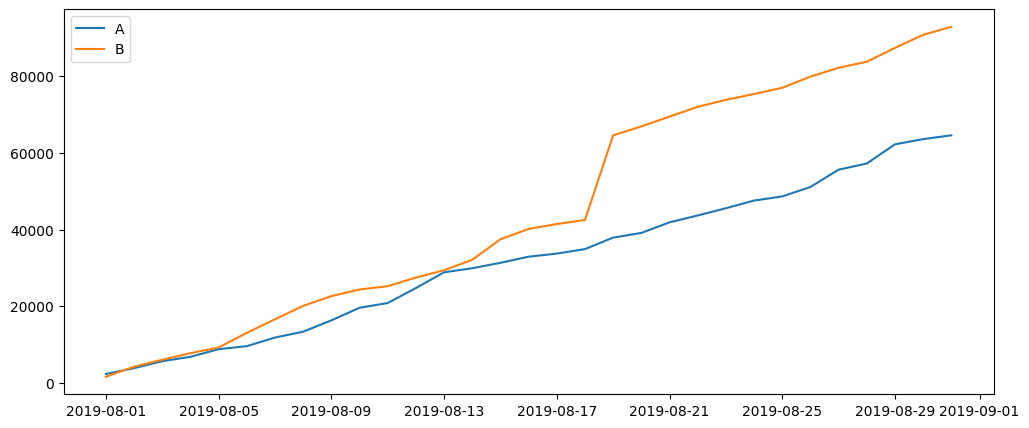

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 5))

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

El gráfico muestra la evolución del ingreso acumulado para dos grupos, etiquetados como A (línea azul) y B (línea naranja), durante el mes de agosto de 2019. A continuación se enumeran algunas conclusiones y conjeturas basadas en la gráfica:

<b> Conclusiones: </b>

1. **Crecimiento Consistente**: Ambos grupos muestran un crecimiento constante a lo largo del mes, lo que sugiere que las actividades que generan ingresos son continuas y progresivas.

2. **Diferencia entre Grupos**: El grupo B tiene un ingreso acumulado consistentemente mayor que el grupo A durante todo el período, indicando que las estrategias o las condiciones que afectan al grupo B son más efectivas o productivas.

3. **Salto Significativo en B**: Alrededor del 17 de agosto, el grupo B experimenta un incremento abrupto en el ingreso acumulado, lo que podría indicar una campaña o evento específico que tuvo un impacto significativo en los ingresos. Esto no se observa en el grupo A, sugiriendo que dicho evento fue exclusivo del grupo B.

4. **Convergencia y Divergencia**: Aunque ambos grupos muestran patrones de crecimiento similares, el grupo B se separa más significativamente del grupo A después del 17 de agosto, indicando que las estrategias o actividades que afectaron a B fueron mucho más efectivas en este punto.

<b> Conjeturas: </b>

1. **Evento o Promoción en B**: Es posible que el grupo B haya tenido una promoción, lanzamiento de un producto, o alguna otra intervención alrededor del 17 de agosto que incrementó significativamente los ingresos.

2. **Segmentos Diferentes**: Los grupos podrían representar diferentes segmentos de clientes o mercados, con B potencialmente compuesto por clientes de mayor valor o un segmento más receptivo a las estrategias aplicadas.

3. **Optimización en B**: Si B representa un experimento o una versión optimizada de una estrategia, este salto en ingresos sugiere que la optimización fue exitosa y merece mayor investigación y replicación para el grupo A.

Si tienes más contexto sobre qué representan los grupos A y B o los ingresos, se podría refinar aún más la interpretación.

### 2.2 Tamaño de pedido promedio acumulado por grupo

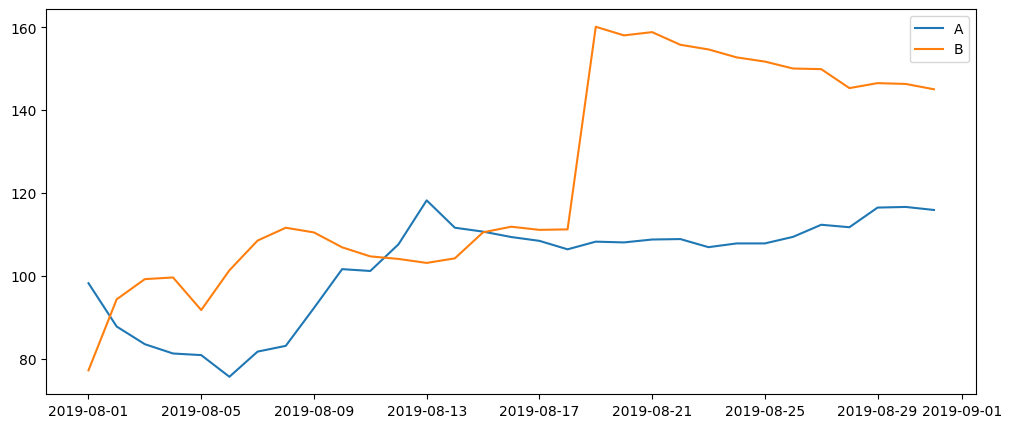

In [16]:
plt.figure(figsize=(12, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

Este gráfico muestra la evolución del tamaño de pedido promedio acumulado para dos grupos, A (línea azul) y B (línea naranja), durante el mes de agosto de 2019.

### Conclusiones:

1. **Tendencias Iniciales Diferentes**: Al principio de agosto, el grupo A tiene un tamaño de pedido promedio ligeramente mayor que el grupo B, pero ambos grupos muestran fluctuaciones antes del 10 de agosto.

2. **Estabilidad en A, Incremento en B**: A partir del 10 de agosto, el grupo A mantiene un tamaño de pedido promedio más estable, mientras que el grupo B sigue un patrón de crecimiento más pronunciado, alcanzando un pico significativo alrededor del 17 de agosto.

3. **Pico Significativo en B**: Similar al gráfico anterior de ingresos acumulados, el grupo B experimenta un aumento notable en el tamaño de pedido promedio el 17 de agosto, lo que podría estar relacionado con un evento específico que incentivó a los clientes a realizar pedidos más grandes.

4. **Desaceleración en B y Convergencia**: Después del pico, el tamaño de pedido promedio en el grupo B se estabiliza y comienza a disminuir ligeramente, pero se mantiene por encima del grupo A, que sigue una tendencia más estable y consistente.

### Conjeturas:

1. **Promociones o Descuentos Específicos en B**: El aumento abrupto del tamaño de pedido promedio en el grupo B podría haber sido causado por una promoción o descuento dirigido que incentivó a los clientes a realizar pedidos de mayor tamaño alrededor del 17 de agosto.

2. **Diferencias en Segmentación**: El grupo B podría representar un segmento de clientes más propenso a hacer pedidos grandes, o podría haber sido expuesto a campañas específicas que afectaron su comportamiento de compra de manera diferente al grupo A.

3. **Optimización o Prueba de Estrategia**: Si el grupo B está bajo una estrategia de ventas diferente (por ejemplo, un nuevo esquema de precios o paquetes), el pico en el tamaño de pedido promedio podría ser un indicio de que dicha estrategia fue efectiva temporalmente.

Este análisis sugiere que el grupo B fue sometido a condiciones que alentaron un aumento temporal en el tamaño de los pedidos, aunque las razones precisas necesitarían ser investigadas en mayor detalle.

### 2.3 Diferencia relativa en el tamaño de pedido promedio

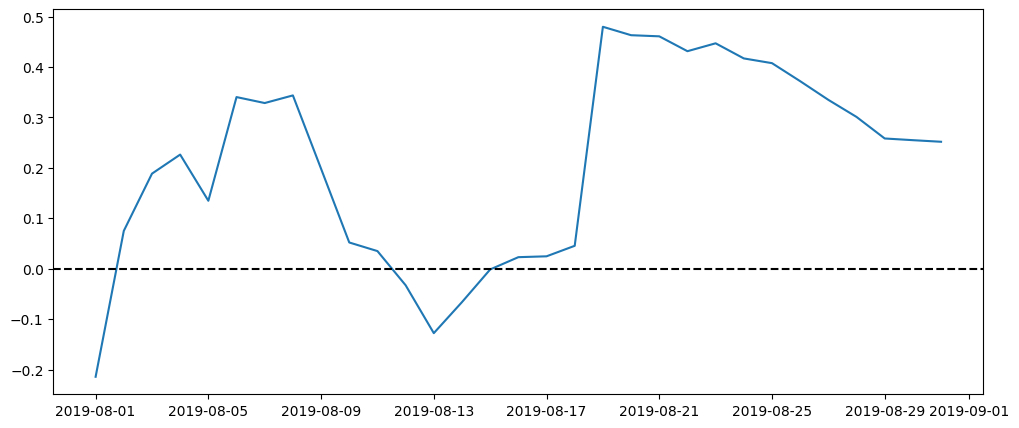

In [17]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

### 2.4 Tasas de conversión diarias

In [18]:
orders['date'].describe()

count                             1197
mean     2019-08-15 13:06:46.015037696
min                2019-08-01 00:00:00
25%                2019-08-08 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

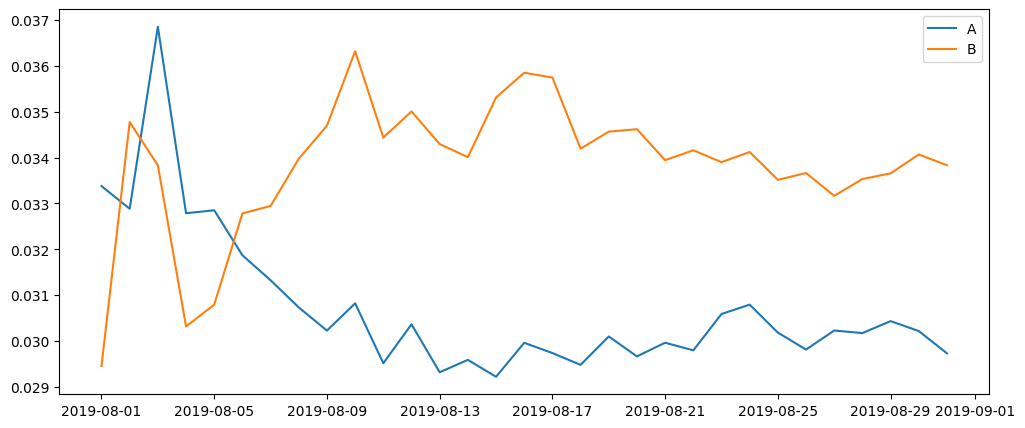

In [19]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.figure(figsize=(12, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

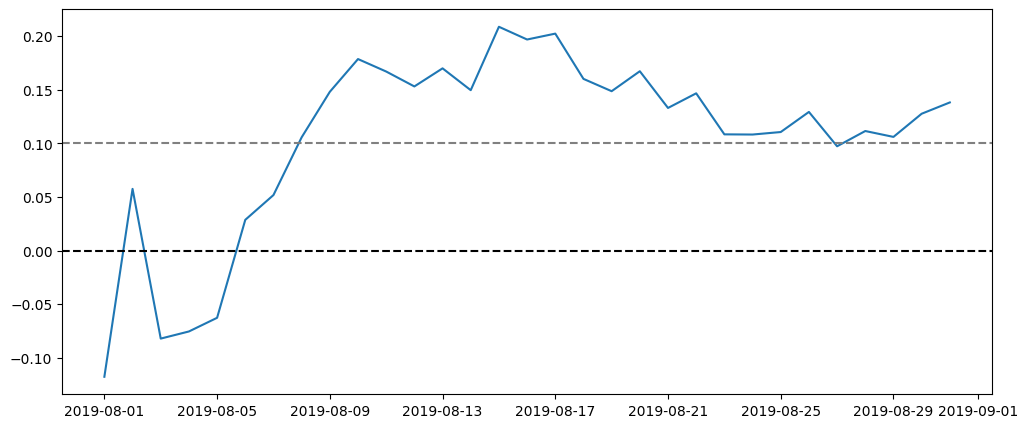

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
    )

plt.figure(figsize=(12, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
# plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
# plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

### 2.5 Gráfico de dispersión del número de pedidos por usuario

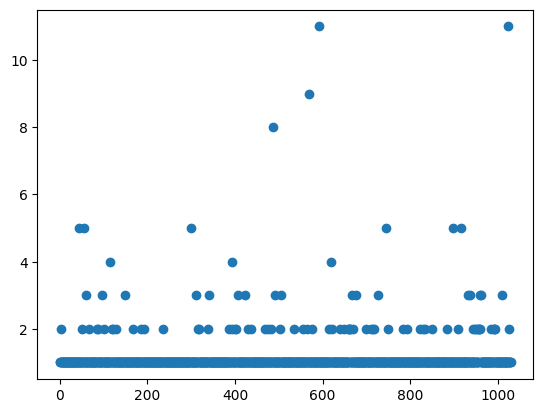

In [21]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

### 2.6 Percentiles 95 y 99 para el número de pedidos por usuario.

In [22]:
percentiles = np.percentile(ordersByUsers['orders'], [90, 95, 99])

print(f'Percentiles de los ingresos de "orders":\n', '[90 95 99] % \n', percentiles, '$')

Percentiles de los ingresos de "orders":
 [90 95 99] % 
 [1. 2. 4.] $


### 2.7 Gráfico de dispersión de los precios de los pedidos

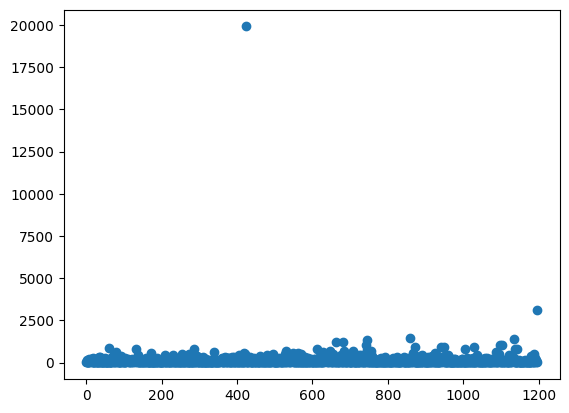

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

### 2.8 Percentiles 95 y 99 de los precios de los pedidos

In [24]:
percentiles = np.percentile(orders['revenue'], [90, 95, 99])

print(f'Percentiles de los ingresos de "orders":\n', '[90      95      99] % \n', percentiles, '$')

Percentiles de los ingresos de "orders":
 [90      95      99] % 
 [282.48  435.54  900.904] $


### 2.9 Significancia estadística de la diferencia en la conversión con datos en bruto.

In [25]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


### 2.10 Significancia estadística de la diferencia en el tamaño promedio de pedido

In [32]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


### 2.11  Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [26]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

(60,)


In [27]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [29]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.020
0.143


### 2.12 Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 

In [30]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.968
-0.021


### 2.13 Toma de decisiones.

Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.